# V2 Notebook

# TODOs:

### Auto extract forms: https://www.thepythoncode.com/article/extracting-and-submitting-web-page-forms-in-python

### Searchsploit
### Full auto cross tool URL collection and traversal
### 'IP Forwarded By' hiding

https://eightytwo.net/blog/brute-forcing-the-admin-password-on-nibbles/

In [1]:
from web_footprinting_utils import setup_ipython

get_ipython, INTERACTIVE = setup_ipython()

In [2]:
%env TARGET=10.10.232.160
%env PORT=80

env: TARGET=10.10.232.160
env: PORT=80


In [3]:
import os 

port = os.environ['PORT']
target_site = os.environ['TARGET']
!ping -c 5 $TARGET

PING 10.10.232.160 (10.10.232.160) 56(84) bytes of data.
64 bytes from 10.10.232.160: icmp_seq=1 ttl=64 time=2.41 ms
64 bytes from 10.10.232.160: icmp_seq=2 ttl=64 time=2.40 ms
64 bytes from 10.10.232.160: icmp_seq=3 ttl=64 time=0.445 ms
64 bytes from 10.10.232.160: icmp_seq=4 ttl=64 time=0.463 ms
64 bytes from 10.10.232.160: icmp_seq=5 ttl=64 time=0.556 ms

--- 10.10.232.160 ping statistics ---
5 packets transmitted, 5 received, 0% packet loss, time 4064ms
rtt min/avg/max/mdev = 0.445/1.255/2.414/0.941 ms


In [4]:
from web_footprinting_utils import WebsiteRecord, LinkRecorder

record = WebsiteRecord(target_site, directory="", port=port)

fingerprinting http://10.10.232.160:80


Whatweb:
http://10.10.232.160:80 [200 OK] Bootstrap, Cookies[connect.sid], Country[RESERVED][ZZ], HTML5, HttpOnly[connect.sid], IP[10.10.232.160], JQuery, Script, Title[Avengers! Assemble!], UncommonHeaders[flag2], X-Powered-By[Express]


Ffuf:

        /'___\  /'___\           /'___\       
       /\ \__/ /\ \__/  __  __  /\ \__/       
       \ \ ,__\\ \ ,__\/\ \/\ \ \ \ ,__\      
        \ \ \_/ \ \ \_/\ \ \_\ \ \ \ \_/      
         \ \_\   \ \_\  \ \____/  \ \_\       
          \/_/    \/_/   \/___/    \/_/       

       v1.3.1 Kali Exclusive <3
________________________________________________

 :: Method           : GET
 :: URL              : http://10.10.232.160:80/FUZZ
 :: Wordlist         : FUZZ: /usr/share/dirb/wordlists/common.txt
 :: Output file      : ffuf_out.json
 :: File format      : json
 :: Follow redirects : true
 :: Calibration      : false
 :: Timeout          : 10
 :: Threads          : 50
 :: Matcher          : Respon

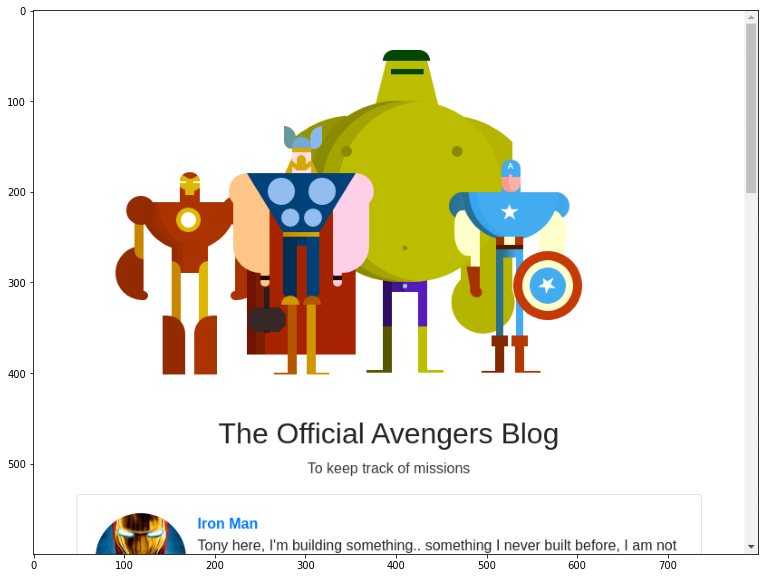

In [5]:
%matplotlib inline
results = record.fingerprint_page()

In [ ]:
record.fingerprint_extended()



Ffuf Extensions:

        /'___\  /'___\           /'___\       
       /\ \__/ /\ \__/  __  __  /\ \__/       
       \ \ ,__\\ \ ,__\/\ \/\ \ \ \ ,__\      
        \ \ \_/ \ \ \_/\ \ \_\ \ \ \ \_/      
         \ \_\   \ \_\  \ \____/  \ \_\       
          \/_/    \/_/   \/___/    \/_/       

       v1.3.1 Kali Exclusive <3
________________________________________________

 :: Method           : GET
 :: URL              : http://10.10.232.160:80/FUZZ
 :: Wordlist         : FUZZ: /usr/share/dirb/wordlists/common.txt
 :: Extensions       : .asp .aspx .bat .c .cfm .cgi .com .dll .exe .htm .html .inc .jhtml .jsa .jsp .log .mdb .nsf .php .phtml .pl .reg .sh .shtml .sql .txt .xml / 
 :: Output file      : ffuf_out.json
 :: File format      : json
 :: Follow redirects : true
 :: Calibration      : false
 :: Timeout          : 5
 :: Threads          : 120
 :: Matcher          : Response status: 200,204,301,302,307,401,403,405
________________________________________________

[Status: 

# Main Checks Complete!

In [ ]:
input("Press any keys...")

In [ ]:
%matplotlib inline
record_alt = WebsiteRecord(target_site, directory="/blog", port=80)
record_alt.fingerprint_page()
record_alt.fingerprint_extended()

In [ ]:
%matplotlib inline
record_alt = WebsiteRecord(target_site, directory="/blog/wp-content", port=80)
record_alt.fingerprint_page()
record_alt.fingerprint_extended()

In [ ]:
%matplotlib inline
record_alt = WebsiteRecord(target_site, directory="/blog/wp-content/plugins", port=80)
record_alt.fingerprint_page()
record_alt.fingerprint_extended()

In [ ]:
%matplotlib inline
record_alt = WebsiteRecord(target_site, directory="/blog/wp-content/plugins/akismet", port=80)
record_alt.fingerprint_page()
record_alt.fingerprint_extended()

In [ ]:
from web_footprinting_utils import save_notebook

save_notebook()

In [ ]:
if INTERACTIVE:
    !jupyter nbconvert --to script "3_Web_Footprinting_V2.ipynb"